License plate blurring

1. Import the basic required libraries

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

2. Read the import image and display it

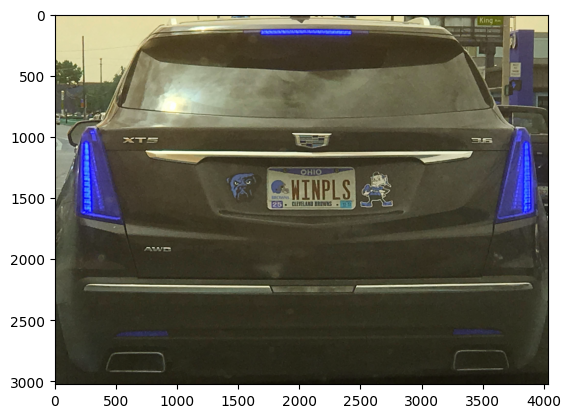

In [18]:
# read the image
img_BGR = cv2.imread('Input_1.jpg')
plt.imshow(img_BGR)

Create a function to display the image to a desired scale

In [19]:
def display(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)

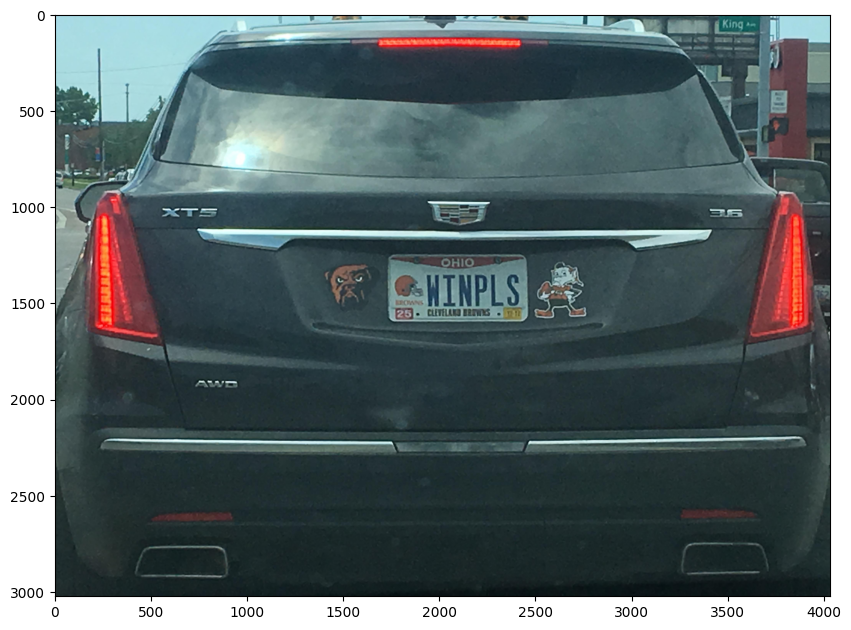

In [20]:
display(img_BGR)

Load the required haarcascade .xml file

In [21]:
plate_cascade = cv2.CascadeClassifier('../../Data/haar_cascades/haarcascade_russian_plate_number.xml')

Create a function to detect the license plate and draw a rectangle around it

In [34]:
def detect_licenseplate(img): # assuming input image is BGR or default format
    plate_img = img.copy()
    rect = plate_cascade.detectMultiScale(plate_img, scaleFactor=1.2, minNeighbors=4)
    # Note: tune the experimental parameters 'scaleFactor' and 'minNeighbors' for better results
    for (x,y,w,h) in rect:
        start_pt = (x,y)
        end_pt = (x+w, y+h)
        cv2.rectangle(plate_img, start_pt, end_pt, (0, 0, 255), 8)
    return plate_img

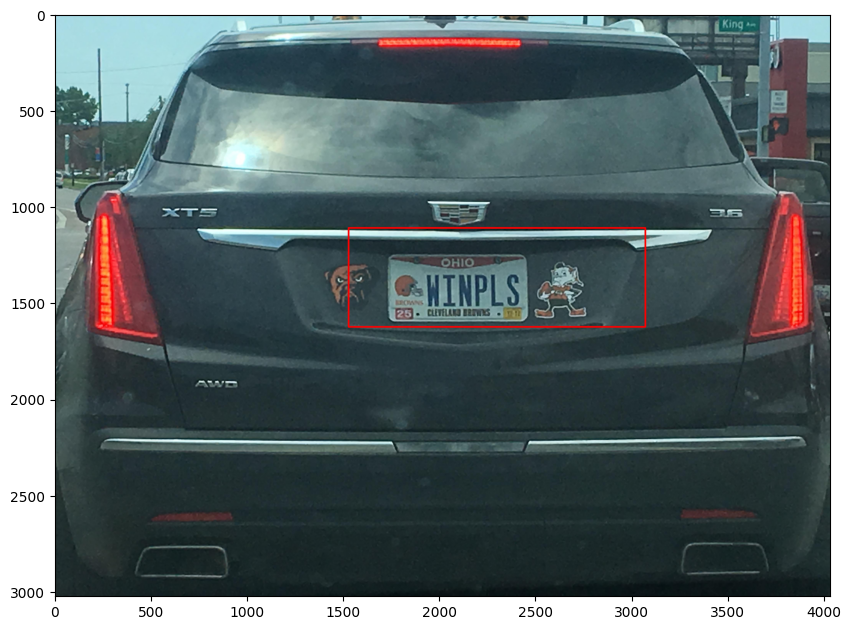

In [35]:
result = detect_licenseplate(img_BGR)
display(result)

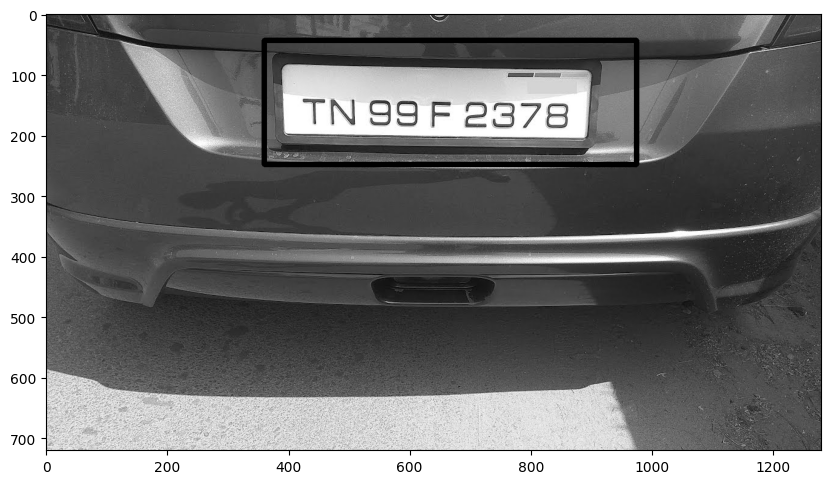

In [36]:
img2 = cv2.imread('Input_2.jpg', 0)
result2 = detect_licenseplate(img2)
display(result2)

Write a function to detect the license plate and blur it

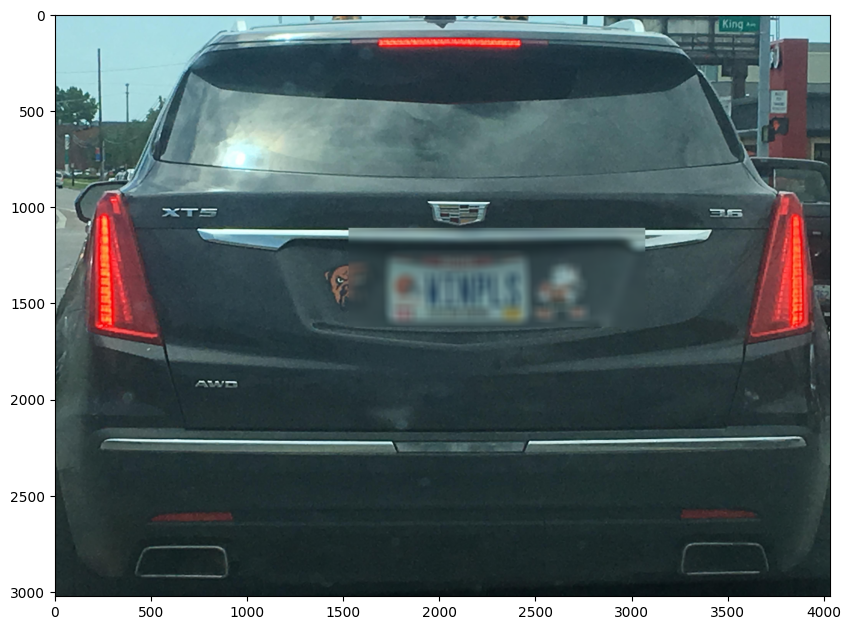

In [56]:
def detect_and_blur_licensePlate(img):
    img_copy = img.copy()
    roi = img.copy()    
    rect = plate_cascade.detectMultiScale(img_copy, scaleFactor=1.2, minNeighbors=4)
    
    for (x, y, w, h) in rect:
        # Extract the Region of Interest
        roi = roi[y:y+h, x:x+w]
        
        # Blur the roi portion
        blurred_roi = cv2.blur(roi, ksize=(55,55)) #cv2.medianBlur(roi, 55)
        
        # replace the original roi by the blurred portion 
        img_copy[y:y+h, x:x+w] = blurred_roi
        
    return img_copy

result_blur1 = detect_and_blur_licensePlate(img_BGR)
display(result_blur1)

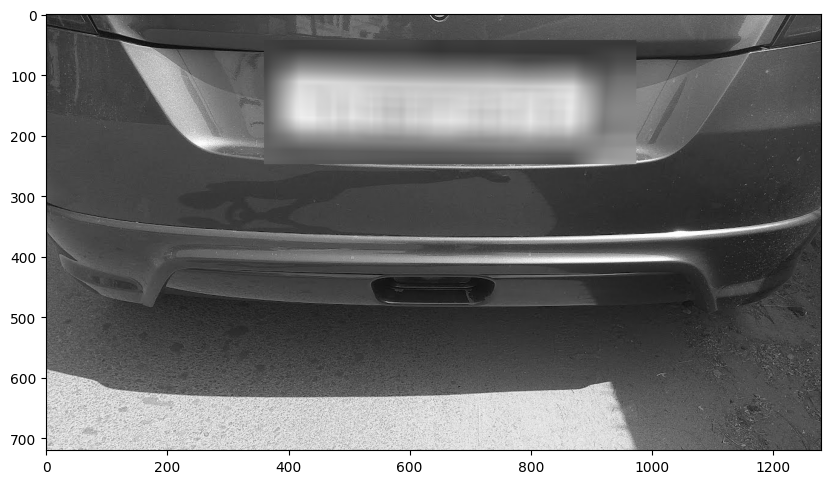

In [57]:
result_blur2 = detect_and_blur_licensePlate(img2)
display(result_blur2)